In [ ]:
%pip install pandas matplotlib yfinance

  Using cached matplotlib-3.8.4-cp39-cp39-win_amd64.whl (7.7 MB)
  Using cached contourpy-1.2.1-cp39-cp39-win_amd64.whl (182 kB)
  Using cached fonttools-4.51.0-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached pillow-10.3.0-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl (56 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\bageg\Desktop\10 Academy\Financial-News-and-Stock-Price-Integration\venv\Scripts\python.exe -m pip install --upgrade pip' command.


# Import Libraries

In [29]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np



# Load data and fix date and time

In [30]:
data = pd.read_csv('/content/raw_analyst_ratings.csv')
# data.head()

# Convert the 'date' column to datetime format
# data['date'] = pd.to_datetime(data['date'],format="mixed")

# print(data['datetime'].dt.tzinfo)
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['date'] = data['date'].replace([np.inf, -np.inf], np.nan)
data['date'].ffill(inplace=True)
print(data['date'].dtype)


datetime64[ns, UTC-04:00]


# Calculate date ranges


In [31]:
# Calculate overall date range for all stocks
min_date = data['date'].min()
max_date = data['date'].max()

# Download stocks from yfinance

In [33]:
symbols = list(map(str, data['stock'].unique()))  # Get unique stock symbols

# Download data for all symbols using the same date range
data_yf = yf.download(symbols, start=min_date, end=max_date)


[*********************100%%**********************]  4435 of 4435 completed
ERROR:yfinance:
1612 Failed downloads:
ERROR:yfinance:['PCO', 'CAPN', 'IMN', 'FWV', 'HPY', 'DTLK', 'AXN', 'FSC', 'HILL', 'CLDN', 'CIE', 'ESSX', 'EDE', 'FSBK', 'CST', 'ONNN', 'FDML', 'CRDS', 'AUXL', 'COVR', 'DAEG', 'HLSS', 'GUID', 'MGT', 'AFOP', 'EOC', 'GEVA', 'ABCW', 'CKP', 'KCC', 'NRX', 'HCN', 'FSL', 'NEOT', 'AUQ', 'ETAK', 'HDRA', 'KYO', 'OGXI', 'CHEV', 'PKY', 'LIQD', 'ALDW', 'FUR', 'AXLL', 'NWY', 'NHTB', 'AVL', 'ISH', 'PCYC', 'MDGN', 'FMER', 'IBCA', 'ENOC', 'MILL', 'GTU', 'CMCSK', 'CSUN', 'OKS', 'OSM', 'PAL', 'AUMA', 'ANAD', 'IXYS', 'DRAM', 'NPD', 'JOY', 'CBIN', 'FCS', 'FNFG', 'LOJN', 'NPBC', 'HVB', 'LMIA', 'FRP', 'CKEC', 'METR', 'PBMD', 'LBMH', 'NDRO', 'ARMH', 'MRD', 'BONA', 'HGG', 'MELA', 'ELX', 'MTSN', 'BSDM', 'BF.B', 'FSIC', 'NTLS', 'JDSU', 'ACAS', 'DEG', 'MW', 'ARO', 'DOVR', 'BWINB', 'IOC', 'NCFT', 'ADAT', 'MBLX', 'AMDA', 'BIOA', 'HGT', 'HDY', 'CWEI', 'PLNR', 'DPRX', 'HSP', 'ITR', 'EVBS', 'BONT', 'BLT', '

In [34]:
data_yf

Price       Adj Close                                                          \
Ticker              A         AA AAC       AADR        AAL AAMC      AAME AAN   
Date                                                                            
2011-04-28  32.852577  37.475021 NaN  29.984306   8.267842  NaN  1.890750 NaN   
2011-04-29  32.584904  37.277664 NaN  30.201443   8.569520  NaN  1.945030 NaN   
2011-05-02  32.930916  37.760086 NaN  30.390266   8.541238  NaN  1.899797 NaN   
2011-05-03  33.035378  38.746864 NaN  29.842690   8.692078  NaN  1.872657 NaN   
2011-05-04  32.317234  38.308277 NaN  29.653877   8.767496  NaN  1.863610 NaN   
...               ...        ...  ..        ...        ...  ...       ...  ..   
2020-06-05  89.397316  11.771712 NaN  50.179188  18.590000  NaN  1.745576 NaN   
2020-06-08  89.308304  12.659224 NaN  50.129360  20.309999  NaN  1.794065 NaN   
2020-06-09  88.793945  12.278860 NaN  50.547935  18.549999  NaN  1.842553 NaN   
2020-06-10  88.833504  11.869241 NaN  51.165833  17.020000  NaN  1.861948 NaN   
2020-06-11  84.105469  10.162489 NaN  49.112820  14.380000  NaN  1.813460 NaN   

Price                          ... Volume                                    \
Ticker        AAOI       AAON  ...    POT    POWI   POWL POWR POZN      PPA   
Date                           ...                                            
2011-04-28     NaN   5.871912  ...    NaN  102000  61000  NaN  NaN    18400   
2011-04-29     NaN   5.825804  ...    NaN  292000  20000  NaN  NaN    26000   
2011-05-02     NaN   5.786787  ...    NaN  708400  53000  NaN  NaN  1500400   
2011-05-03     NaN   5.692794  ...    NaN  846200  38000  NaN  NaN    98000   
2011-05-04     NaN   5.586387  ...    NaN  902000  83600  NaN  NaN    39000   
...            ...        ...  ...    ...     ...    ...  ...  ...      ...   
2020-06-05   9.980  38.115162  ...    NaN  551600  72600  NaN  NaN    93700   
2020-06-08  10.240  37.756016  ...    NaN  371800  88600  NaN  NaN   101200   
2020-06-09   9.695  37.409927  ...    NaN  372000  65500  NaN  NaN    91300   
2020-06-10   9.390  36.796124  ...    NaN  329600  51400  NaN  NaN    59800   
2020-06-11   8.650  33.883774  ...    NaN  437400  48200  NaN  NaN   147400   

Price                                           
Ticker         PPBI      PPC      PPG      PPH  
Date                                            
2011-04-28    35000  1123200  1269800   268000  
2011-04-29     4600  3020300  2200000  3449800  
2011-05-02    34000  2114500  1531200   552000  
2011-05-03     3700  1029000  2552400   926200  
2011-05-04     8300   543300  2317000  1001200  
...             ...      ...      ...      ...  
2020-06-05   970700  2565500  2057200    14800  
2020-06-08   925200  2258500  1522500    30500  
2020-06-09  2479900  1495100  1559500     9600  
2020-06-10  1002200  1373600  1826200    15100  
2020-06-11  1403400  2165700  2452500    24000  

[2296 rows x 26610 columns]

In [41]:
data_yf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2296 entries, 2011-04-28 to 2020-06-11
Columns: 26610 entries, ('Adj Close', 'A') to ('Volume', 'PPH')
dtypes: float64(24530), int64(2080)
memory usage: 466.1 MB


#  Install TA-lib

In [42]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib

--2024-05-04 07:44:05--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-05-04 07:44:05--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-05-04 07:44:05--  http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

# Import TA-lib

In [43]:
import talib as ta

# Get Apple and IBM data for Analysis Indicators

In [86]:
# get stock for  apple and ibm data
start_date = pd.Timestamp.now() - pd.DateOffset(month=1)
end_date = pd.Timestamp.now()

apple_data = yf.download('AAPL', start= start_date, end=end_date, interval='1h')
ibm_data = yf.download('IBM', start= start_date, end=end_date, interval='1h')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [87]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-01-04 09:30:00-05:00,182.149994,183.087204,181.227600,181.679993,181.679993,16075231
2024-01-04 10:30:00-05:00,181.669998,182.354996,180.880005,182.125000,182.125000,10313237
2024-01-04 11:30:00-05:00,182.126999,182.440002,181.320007,182.139999,182.139999,7509793
2024-01-04 12:30:00-05:00,182.130005,182.990005,181.960007,182.914993,182.914993,4961844
2024-01-04 13:30:00-05:00,182.910004,183.070007,182.419998,182.500000,182.500000,4172442


In [88]:
ibm_data.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-01-04 09:30:00-05:00,160.220001,161.600006,160.169998,161.509995,161.509995,488702
2024-01-04 10:30:00-05:00,161.485001,161.744995,161.279999,161.630005,161.630005,307706
2024-01-04 11:30:00-05:00,161.630005,161.800003,161.180298,161.565002,161.565002,279548
2024-01-04 12:30:00-05:00,161.585007,161.619995,161.240005,161.494995,161.494995,212035
2024-01-04 13:30:00-05:00,161.509995,161.619995,161.399994,161.500000,161.500000,175308


In [92]:
def calculate_indicators(data):
  # Calculate indicators
  data['SMA'] = ta.SMA(data['Close'], timeperiod=50,)
  data['RSI'] = ta.RSI(data['Close'], timeperiod=14,)

  # Handle indicators with multiple input data (use try-except for potential NaNs)
  try:
    data['MACD'], data['MACDsignal'], data['MACDhist'] = ta.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
  except ValueError:
    data['MACD'] = data['MACDsignal'] = data['MACDhist'] = np.nan  # Assign NaN if calculation fails

  return data

In [93]:
apple_data = calculate_indicators(apple_data)
ibm_data = calculate_indicators(ibm_data)

In [94]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MACD,MACDsignal,MACDhist
Datetime,,,,,,,,,,,
2024-01-04 09:30:00-05:00,182.149994,183.087204,181.227600,181.679993,181.679993,16075231,NaN,NaN,NaN,NaN,NaN
2024-01-04 10:30:00-05:00,181.669998,182.354996,180.880005,182.125000,182.125000,10313237,NaN,NaN,NaN,NaN,NaN
2024-01-04 11:30:00-05:00,182.126999,182.440002,181.320007,182.139999,182.139999,7509793,NaN,NaN,NaN,NaN,NaN
2024-01-04 12:30:00-05:00,182.130005,182.990005,181.960007,182.914993,182.914993,4961844,NaN,NaN,NaN,NaN,NaN
2024-01-04 13:30:00-05:00,182.910004,183.070007,182.419998,182.500000,182.500000,4172442,NaN,NaN,NaN,NaN,NaN


In [95]:
ibm_data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MACD,MACDsignal,MACDhist
Datetime,,,,,,,,,,,
2024-01-04 09:30:00-05:00,160.220001,161.600006,160.169998,161.509995,161.509995,488702,NaN,NaN,NaN,NaN,NaN
2024-01-04 10:30:00-05:00,161.485001,161.744995,161.279999,161.630005,161.630005,307706,NaN,NaN,NaN,NaN,NaN
2024-01-04 11:30:00-05:00,161.630005,161.800003,161.180298,161.565002,161.565002,279548,NaN,NaN,NaN,NaN,NaN
2024-01-04 12:30:00-05:00,161.585007,161.619995,161.240005,161.494995,161.494995,212035,NaN,NaN,NaN,NaN,NaN
2024-01-04 13:30:00-05:00,161.509995,161.619995,161.399994,161.500000,161.500000,175308,NaN,NaN,NaN,NaN,NaN


In [99]:
import plotly.express as px

def plot_data(data, title):
  fig = px.line(data, x = data.index, y = [data.SMA, data.RSI, data.MACD], title=title )
  fig.show()

In [100]:
plot_data(apple_data, 'Apple Stock Analysis')

In [101]:
plot_data(ibm_data, 'IBM Stock Analysis')

# Install and import quantstats for quantitative analysis

In [107]:
!pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 986.6 kB/s eta 0:00:00


In [108]:
import quantstats as qs

In [130]:
apple_qs = qs.utils.download_returns('AAPL')
apple_qs = apple_qs.loc[start_date:end_date]
ibm_qs = qs.utils.download_returns('IBM')
ibm_qs = ibm_qs.loc[start_date:end_date]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [110]:
apple_qs.head()

Date
2024-01-05   -0.004013
2024-01-08    0.024175
2024-01-09   -0.002263
2024-01-10    0.005671
2024-01-11   -0.003223
Name: Close, dtype: float64

In [131]:
ibm_qs.head()

Date
2024-01-05   -0.010568
2024-01-08    0.012440
2024-01-09   -0.006578
2024-01-10    0.007184
2024-01-11    0.005768
Name: Close, dtype: float64

In [125]:
apple_qs.info()
apple_qs.shape


<class 'pandas.core.series.Series'>
DatetimeIndex: 83 entries, 2024-01-05 to 2024-05-03
Series name: Strategy
Non-Null Count  Dtype  
--------------  -----  
83 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


(83,)

In [132]:
# show sharpe ratio
qs.stats.sharpe(apple_qs)
qs.stats.sharpe(ibm_qs)

0.45428266354077435

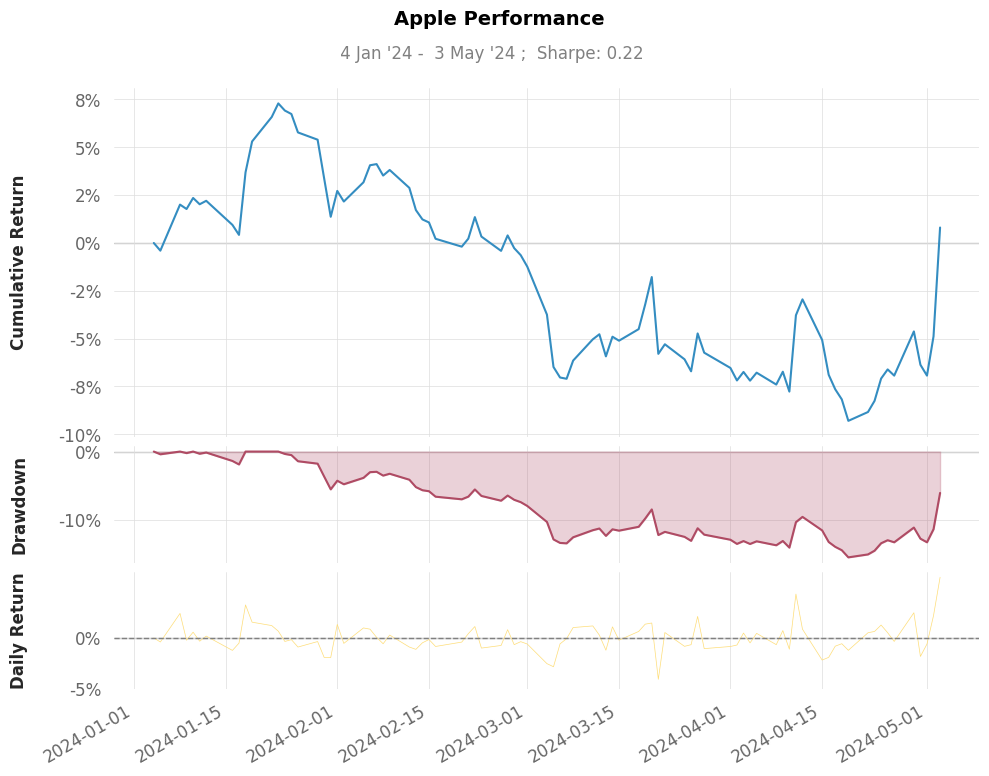

In [116]:
# Plot Performance
qs.plots.snapshot(apple_qs, title='Apple Performance', show=True)

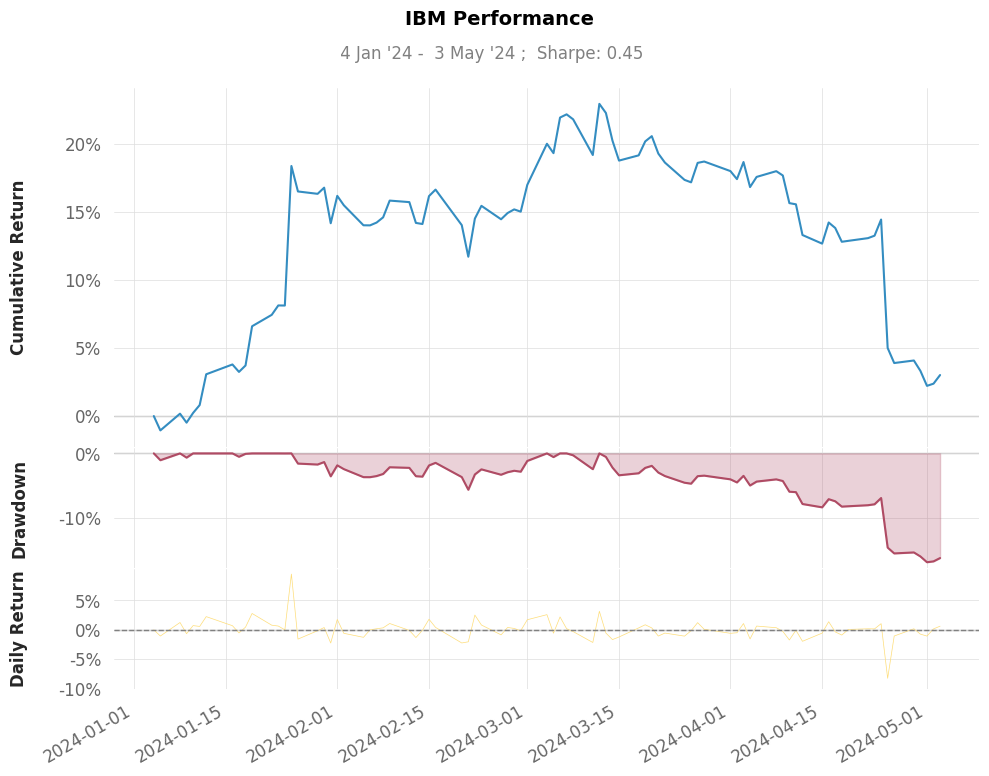

In [133]:
# Plot Performance
qs.plots.snapshot(ibm_qs, title='IBM Performance', show=True)

In [134]:
# Calculate Calmar Ratio
calmar_ratio = qs.stats.calmar(apple_qs)
calmar_ratio2 = qs.stats.calmar(ibm_qs)
print(f"Calmar Ratio Apple: {calmar_ratio:.2f}")
print(f"Calmar Ratio IBM: {calmar_ratio2:.2f}")

Calmar Ratio Apple: 0.11
Calmar Ratio IBM: 0.39
